###  simulation des capteurs des données environnementaux et de l'énérgie 

In [2]:
import pandas as pd
import random
from datetime import datetime, timedelta
import seaborn as sns

# Define the start and end date for the data generation
start_date = datetime(2023, 5, 13, 22, 52, 3)
end_date = datetime(2024, 5, 13, 22, 54, 3)

# Define the time interval (5 minutes)
time_interval = timedelta(minutes=5)

# Create an empty list to store the data rows
data_rows = []

# Generate data for each 5-minute interval
while start_date <= end_date:
    time = start_date.strftime("%Y-%m-%d %H:%M:%S.%f")
    temperature = random.uniform(20, 30)
    humidity = random.uniform(40, 60)
    pressure = random.uniform(900, 950)
    voltage = random.uniform(220, 230)
    current = random.uniform(1, 5)
    energy_consumption = random.uniform(0, 10)

    # Create a data row as a list
    row = [time, temperature, humidity, pressure,
           voltage, current, energy_consumption]

    # Append the data row to the list
    data_rows.append(row)

    # Increment the start date by 5 minutes
    start_date += time_interval

# Create a DataFrame from the data rows
df = pd.DataFrame(data_rows, columns=[
                  'time', 'temperature', 'humidity', 'pressure', 'voltage', 'current', 'energy_Consumption'])

# Write the DataFrame to a CSV file
df.to_csv('sensor_data.csv', index=False)

## chargment et préparation des données des capteurs 

In [73]:
# Write the DataFrame to a CSV file
df.to_csv('sensor_data.csv', index=False)

In [74]:
# visualisation de la Dataset
dataset = pd.read_csv("sensor_data.csv")
dataset

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,2023-05-13 22:52:03.000000,23.910936,59.901638,923.417346,224.799935,3.058928,0.165655
1,2023-05-13 22:57:03.000000,22.625589,51.680900,926.415448,223.759419,3.891146,7.137662
2,2023-05-13 23:02:03.000000,22.871855,42.236366,930.898117,223.385711,3.489838,0.996824
3,2023-05-13 23:07:03.000000,21.691557,44.489921,939.183132,221.916033,4.667046,7.152346
4,2023-05-13 23:12:03.000000,29.292328,49.141092,911.390671,225.587072,1.945307,2.040548
...,...,...,...,...,...,...,...
105404,2024-05-13 22:32:03.000000,28.994092,41.604303,918.278241,220.909652,3.871523,7.758994
105405,2024-05-13 22:37:03.000000,27.423122,42.001977,916.231391,220.970450,1.853019,3.072712
105406,2024-05-13 22:42:03.000000,29.109631,59.293413,916.712852,225.897449,2.403628,2.092553
105407,2024-05-13 22:47:03.000000,22.864167,40.253642,934.496090,225.462739,1.214626,1.704355


In [75]:
# Supprimer les lignes contenant des valeurs manquantes (NaN) du DataFrame "dataset".
dataset = dataset.dropna()

# Convertir la colonne de temps en format datetime
dataset['time']=  pd.to_datetime(dataset['time']) # day is given as timestamp

# Extraire uniquement le jour, le mois et l'année de la colonne "time"
dataset['time']=  pd.to_datetime(dataset['time'],format='%Y%m%d').dt.date

dataset

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,2023-05-13,23.910936,59.901638,923.417346,224.799935,3.058928,0.165655
1,2023-05-13,22.625589,51.680900,926.415448,223.759419,3.891146,7.137662
2,2023-05-13,22.871855,42.236366,930.898117,223.385711,3.489838,0.996824
3,2023-05-13,21.691557,44.489921,939.183132,221.916033,4.667046,7.152346
4,2023-05-13,29.292328,49.141092,911.390671,225.587072,1.945307,2.040548
...,...,...,...,...,...,...,...
105404,2024-05-13,28.994092,41.604303,918.278241,220.909652,3.871523,7.758994
105405,2024-05-13,27.423122,42.001977,916.231391,220.970450,1.853019,3.072712
105406,2024-05-13,29.109631,59.293413,916.712852,225.897449,2.403628,2.092553
105407,2024-05-13,22.864167,40.253642,934.496090,225.462739,1.214626,1.704355


In [150]:
# la moyenne journalière pour chaque colonne
daily_mean = dataset.groupby('time').mean().reset_index()

In [151]:
daily_mean

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,2023-05-13,26.491615,50.657849,929.010948,224.803242,3.126212,4.102806
1,2023-05-14,25.090250,49.848869,925.357494,224.801332,2.975768,5.232811
2,2023-05-15,25.002007,50.529256,925.616208,224.977429,3.163857,5.129189
3,2023-05-16,24.908593,50.098049,923.888921,225.044956,3.043899,4.948650
4,2023-05-17,24.674505,50.875687,924.077130,224.442040,3.014867,4.959281
...,...,...,...,...,...,...,...
362,2024-05-09,24.972044,49.426730,926.393042,224.864975,3.050580,5.006999
363,2024-05-10,24.927379,50.349539,924.726436,224.746262,2.955570,4.893795
364,2024-05-11,25.096423,49.469991,924.666518,225.059527,3.001952,4.791445
365,2024-05-12,25.004026,49.707431,925.692609,225.153870,2.991571,4.912724


## Visualsation de l'évolution de la consommation journaliére de l'énérgie 

In [119]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


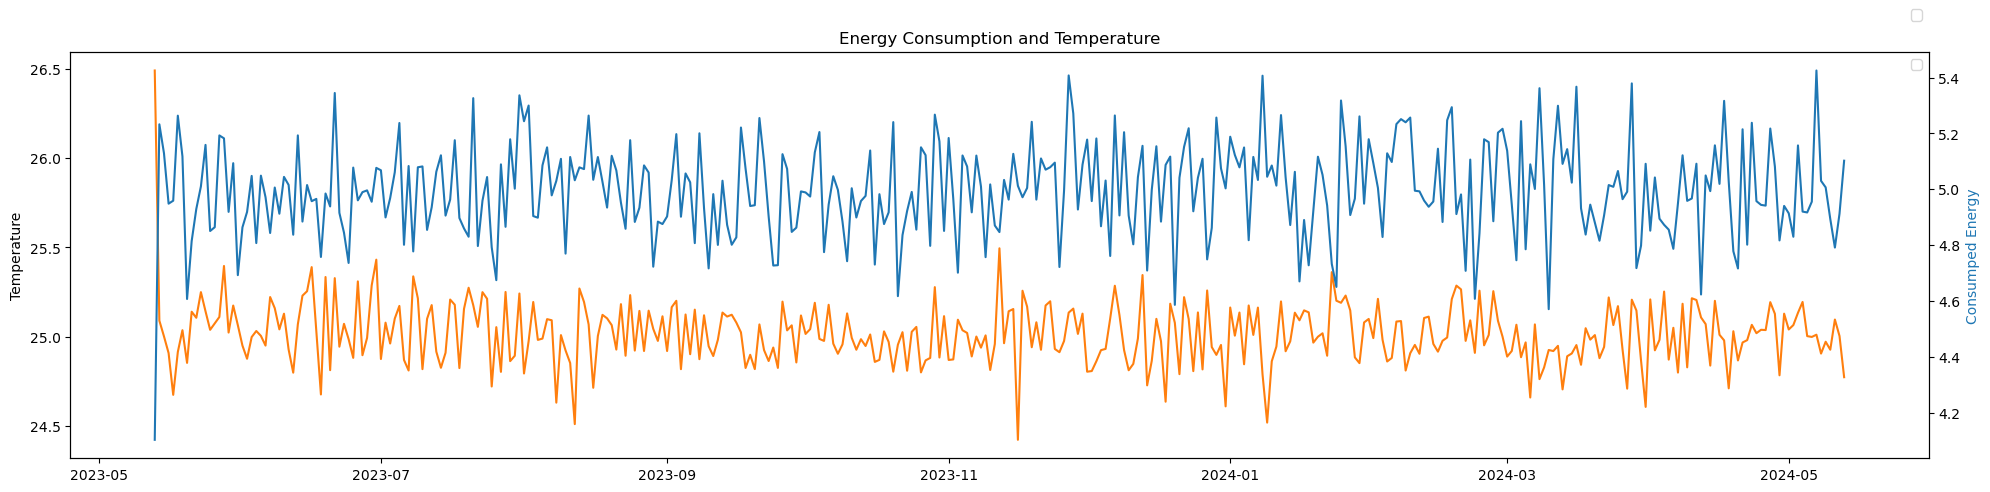

In [120]:
# Visualsation de la consommation journaliére d'énergie en fonction de la température  
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(daily_mean.time, daily_mean.temperature, color = 'tab:orange')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(daily_mean.time, daily_mean.energy_Consumption, color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


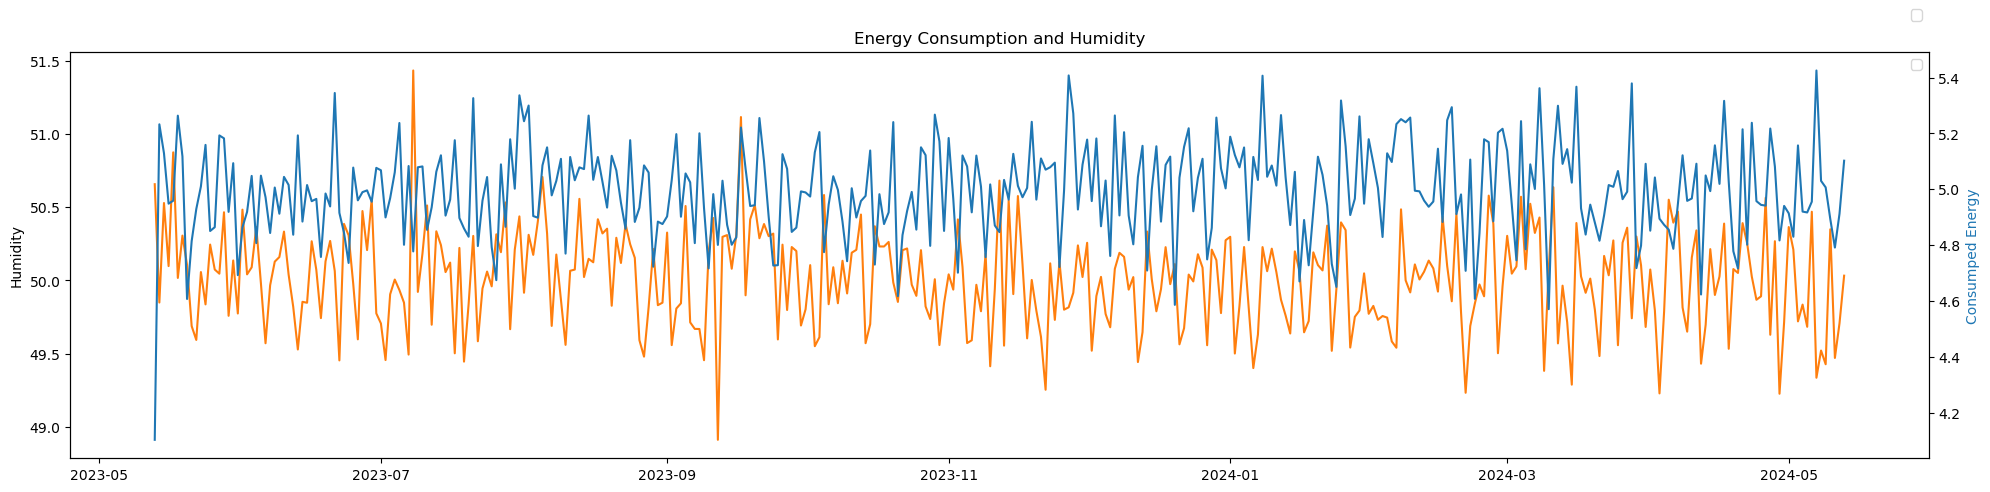

In [121]:
# Visualsation de la consommation journaliére d'énergie en fonction de l'humidité 
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(daily_mean.time, daily_mean.humidity, color = 'tab:orange')
ax1.set_ylabel('Humidity')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(daily_mean.time, daily_mean.energy_Consumption, color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


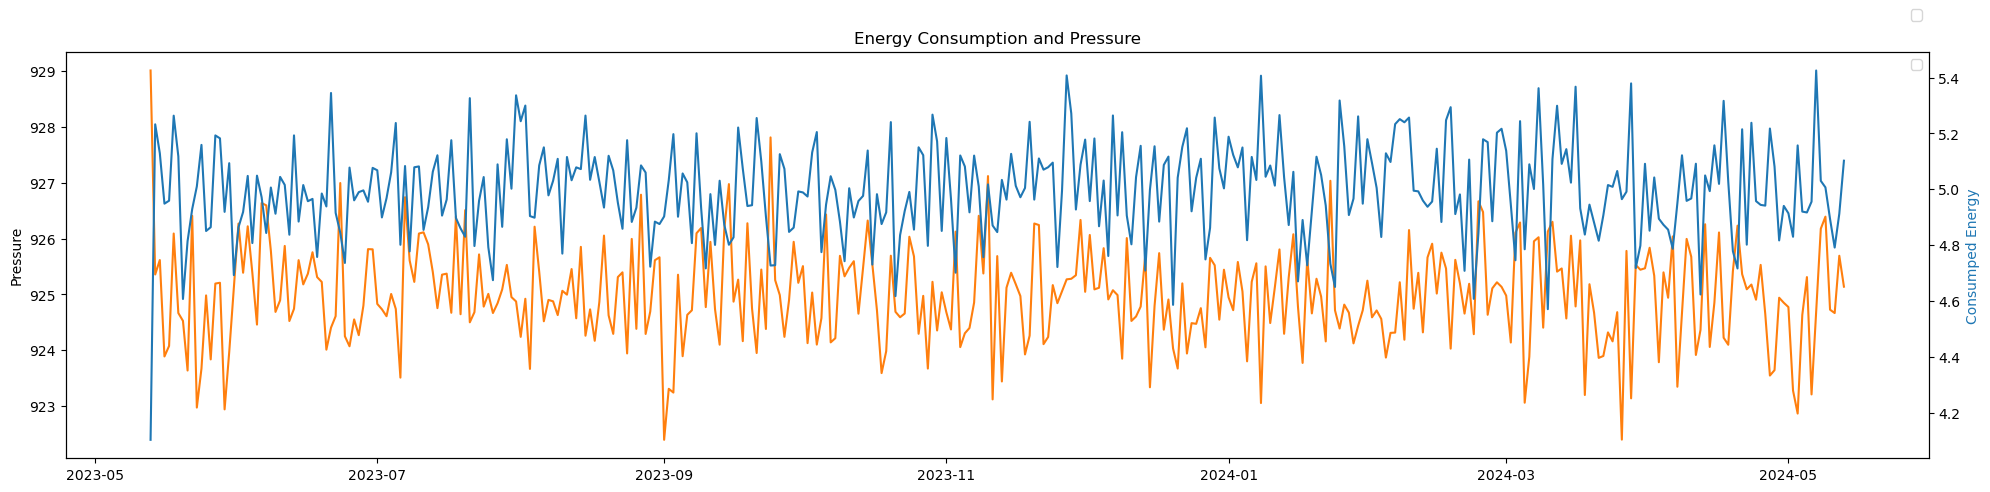

In [122]:
# Visualsation de la consommation journaliére d'énergie en fonction de la pression  
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(daily_mean.time, daily_mean.pressure, color = 'tab:orange')
ax1.set_ylabel('Pressure')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(daily_mean.time, daily_mean.energy_Consumption, color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Pressure')
fig.tight_layout()
plt.show()

## Prédiction de la consommation d'énérgie en fonction des paramétres environnementaux

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ARDRegression, Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [152]:
days = daily_mean['time']

daily_mean['time'] = (daily_mean['time'] - daily_mean['time'].min())  / np.timedelta64(1,'D')

daily_mean

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,0.0,26.491615,50.657849,929.010948,224.803242,3.126212,4.102806
1,1.0,25.090250,49.848869,925.357494,224.801332,2.975768,5.232811
2,2.0,25.002007,50.529256,925.616208,224.977429,3.163857,5.129189
3,3.0,24.908593,50.098049,923.888921,225.044956,3.043899,4.948650
4,4.0,24.674505,50.875687,924.077130,224.442040,3.014867,4.959281
...,...,...,...,...,...,...,...
362,362.0,24.972044,49.426730,926.393042,224.864975,3.050580,5.006999
363,363.0,24.927379,50.349539,924.726436,224.746262,2.955570,4.893795
364,364.0,25.096423,49.469991,924.666518,225.059527,3.001952,4.791445
365,365.0,25.004026,49.707431,925.692609,225.153870,2.991571,4.912724


In [153]:
# Diviser les données en entrée X (température, humidité et pression) et en sortie y (courant et tension)
X = daily_mean[['time', 'temperature', 'humidity', 'pressure']]
y = daily_mean[['energy_Consumption']]

train_ratio = int(len(X) * 0.8)

X_train = X[0:train_ratio]
X_test = X[train_ratio:len(X)]

y_train = y[0:train_ratio]
y_test = y[train_ratio:len(X)]

In [154]:
# Mise à l'échelle des données en utilisant la classe StandardScaler de scikit-learn.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
# Entraînement et l'évaluation de différents modèles de régression
regressors = []

regressors.append(('Linear Regressor', LinearRegression()))
regressors.append(('Ridge', Ridge()))
regressors.append(('Decision Tree', DecisionTreeRegressor()))
regressors.append(('Random Forest', RandomForestRegressor(n_estimators=100, n_jobs=-1)))
regressors.append(('ARD Regressor', ARDRegression()))

for name, model in regressors:
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    print(name)
    print("R2 Score: {}".format(r2_score(y_test, y_pred)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Linear Regressor
R2 Score: -0.09742900071673177
Root Mean Squared Error: 0.18327626283627302
Ridge
R2 Score: -0.09683164713796999
Root Mean Squared Error: 0.1832263754933764
Decision Tree
R2 Score: -2.1696195489932406
Root Mean Squared Error: 0.31147383681964774
Random Forest
R2 Score: -0.2548322779883716
Root Mean Squared Error: 0.19597959011882382
ARD Regressor
R2 Score: -0.06400566813530273
Root Mean Squared Error: 0.18046374890369948


In [181]:
regressors = DecisionTreeRegressor()

regressors.fit(X_train, y_train.values.ravel())
y_pred = regressors.predict(X_test)

In [182]:
result = pd.DataFrame()
result['Prediction'] = y_pred
result['True'] = y_test.values.ravel()
result['Diff'] = y_test.values.ravel() - y_pred

result

,Prediction,True,Diff
0,5.149878,5.138102,-0.011777
1,4.607765,4.945522,0.337757
2,5.247514,4.745966,-0.501548
3,4.701423,5.244162,0.542740
4,4.607765,4.785284,0.177519
...,...,...,...
69,5.179276,5.006999,-0.172277
70,5.168980,4.893795,-0.275185
71,5.145474,4.791445,-0.354029
72,5.247514,4.912724,-0.334790


In [167]:
test_days = days[train_ratio:len(X)]

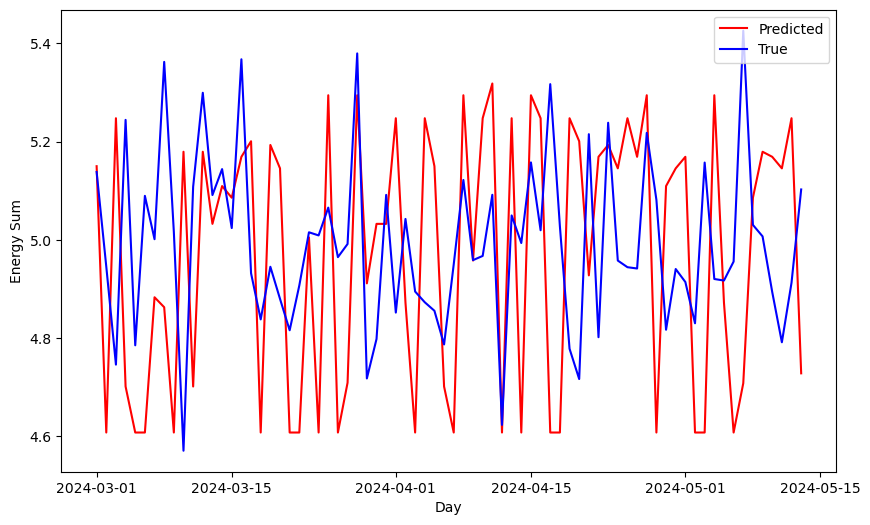

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(test_days, result['Prediction'], color='r', label='Predicted')
plt.plot(test_days, result['True'], color='b', label='True')
plt.xlabel('Day')
plt.ylabel('Energy Sum')
plt.legend(loc='upper right')
plt.show()